In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
iris= load_iris()

x= iris.data[:,:]
y= iris.target[:]

In [5]:
x.shape, y.shape

((150, 4), (150,))

In [12]:
y=pd.get_dummies(y).values

In [8]:
y.shape

(150, 3)

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
features, labels= x.shape[1], y.shape[1]

In [18]:
X= tf.placeholder(tf.float32, [None, features])
Y= tf.placeholder(tf.float32, [None,labels])

In [19]:
w= tf.Variable(tf.zeros([4,3]))
b= tf.Variable(tf.zeros([3]))

In [58]:
init= tf.global_variables_initializer()

In [30]:
with tf.Session() as session:
    session.run(init)
    print(session.run(w))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [46]:
weights= tf.Variable(tf.random_normal([features,labels], mean=0, stddev=0.01,name="weights"))

bias= tf.Variable(tf.random_normal([1,labels], mean=0, stddev=0.01,name="bias" ))

In [51]:
weight_op= tf.matmul(X, weights, name= "apply_weights")

add_bias= tf.add(weight_op, bias, name="add_bias")

activation_op= tf.nn.sigmoid(add_bias, name="activation")

In [76]:
epoch=1000

learning_rate= tf.train.exponential_decay(learning_rate=0.0008, 
                                          global_step=1, 
                                          decay_steps=xtrain.shape[0], 
                                          decay_rate= 0.95,
                                          staircase=True)

In [62]:
correct_predictions_op = tf.equal(tf.argmax(activation_op,1),tf.argmax(Y,1))

accuracy_op = tf.reduce_mean(tf.cast(correct_predictions_op, "float"))

cost_op= tf.nn.l2_loss(activation_op-Y, name="squared_error_cost")

training_op= tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_op)

In [99]:
accuracy_values=[]
cost_values=[]
oldcost=0

with tf.Session() as session:
    
    session.run(init)
    
    for i in range(1000):
        t=session.run(training_op, feed_dict={X: xtrain, Y: ytrain})
        if i%100==0:
            
            accuracy, newcost = session.run([accuracy_op,cost_op],feed_dict={X: xtrain, Y: ytrain} )  
            
            accuracy_values.append(accuracy)
            
            cost_values.append(newcost)
            
            diff_of_cost= abs(newcost-oldcost)
            oldcost=newcost
            
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, accuracy, newcost, diff_of_cost))

    print("\n\nfinal accuracy on test set: %s" %str(session.run(accuracy_op,feed_dict={X: xtest, Y: ytest} )))       

step 0, training accuracy 0.35, cost 34.783, change in cost 34.783
step 100, training accuracy 0.65, cost 20.7304, change in cost 14.0526
step 200, training accuracy 0.72, cost 18.0595, change in cost 2.67083
step 300, training accuracy 0.79, cost 16.8493, change in cost 1.21026
step 400, training accuracy 0.83, cost 16.0759, change in cost 0.773357
step 500, training accuracy 0.89, cost 15.5017, change in cost 0.574197
step 600, training accuracy 0.9, cost 15.0427, change in cost 0.458996
step 700, training accuracy 0.91, cost 14.6605, change in cost 0.382217
step 800, training accuracy 0.91, cost 14.3341, change in cost 0.326415
step 900, training accuracy 0.93, cost 14.0505, change in cost 0.283556


final accuracy on test set: 0.98


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


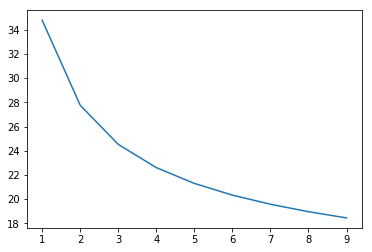

In [100]:
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()